# Two Parent Population
## First try
### 99/07/22

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
sex_ratio = 107/207
inf_av = 2.2
inf_s  = 1.5

In [3]:
#first generation population
n = 100

#male-female 
n_f = 0
n_m = 0

for i in range(n):
    if random.random() > sex_ratio:
        n_f = n_f + 1
    else:
        n_m = n_m + 1
    

#couples number
if n_m > n_f:
    n_couples = n_f
else:
    n_couples = n_f
    
print(n_couples)
    
#new generation
n_next = 0
n_f = 0
n_m = 0
for i in range(n_couples):
    inf_num = int(np.random.normal(inf_av, inf_s, 1))
    n_next = n_next + inf_num
    for j in range(inf_num):
        if random.random() > sex_ratio:
            n_f = n_f + 1
        else:
            n_m = n_m + 1
            
print(n_next, n_f, n_m)

46
91 49 42


In [4]:
def next_gen(n_f, n_m, sex_ratio, inf_av, inf_s):
    #couple
    if n_m > n_f:
        n_couples = n_f
    else:
        n_couples = n_f
    
    #new generation
    n_next = 0
    n_f = 0
    n_m = 0
    for i in range(n_couples):
        inf_num = int(np.random.normal(inf_av, inf_s, 1))
        n_next = n_next + inf_num
        for j in range(inf_num):
            if random.random() > sex_ratio:
                n_f = n_f + 1
            else:
                n_m = n_m + 1
    
    return n_f, n_m 

In [5]:
next_gen(n_f, n_m, sex_ratio, inf_av, inf_s)

(42, 46)

In [13]:
%%time

x = 40
T = np.arange(x)
pop = np.zeros((x, 2))
pop[0, 0] = n_f
pop[0, 1] = n_m

sex_ratio = 107/207
inf_av = 2.1
inf_s  = 1.5

ave = 15
av  = np.zeros((ave, 2))

for t in range(x-1):
    for i in range(ave):
        av[i, 0], av[i, 1] = next_gen(int(pop[t, 0]), int(pop[t, 1]), sex_ratio, inf_av, inf_s)
    pop[t + 1, 0], pop[t + 1, 1] = np.mean(av[:, 0]), np.mean(av[:, 1])
    

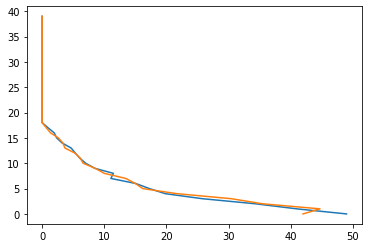

In [14]:
plt.plot(pop[:, 0], T)
plt.plot(pop[:, 1], T)

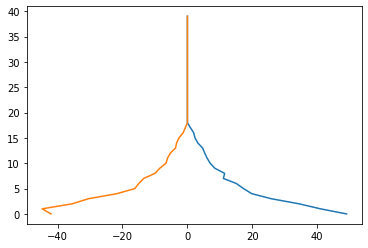

In [16]:
plt.plot(pop[:, 0], T, -pop[:, 1], T)
#plt.plot(-pop[:, 1], T)

Wall time: 3.15 s


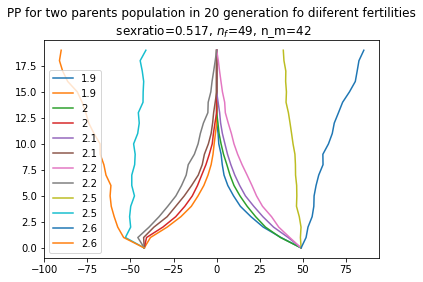

In [30]:
%%time

for inf_av in [1.9, 2, 2.1, 2.2,2.5, 2.6]:

    x = 20
    T = np.arange(x)
    pop = np.zeros((x, 2))
    pop[0, 0] = n_f
    pop[0, 1] = n_m

    sex_ratio = 107/207
    inf_s  = 1.5

    ave = 100
    av  = np.zeros((ave, 2))

    for t in range(x-1):
        for i in range(ave):
            av[i, 0], av[i, 1] = next_gen(int(pop[t, 0]), int(pop[t, 1]), sex_ratio, inf_av, inf_s)
        pop[t + 1, 0], pop[t + 1, 1] = np.mean(av[:, 0]), np.mean(av[:, 1])
    
    plt.plot(pop[:, 0], T, -pop[:, 1], T, label = '{}'.format(inf_av))
    
plt.title('PP for two parents population in {} generation fo diiferent fertilities\n sexratio={}, $n_f$={}, n_m={}'.format(x, np.round(sex_ratio, 3), n_f, n_m))
plt.legend()
